In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14990005454308638895,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12285204178368543620
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15870492672
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5221765313197818827
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14398080637561826016
 physical_device_desc: "device: XLA_GPU device"]

In [3]:
import sys
import time
import math
import os
import pandas as pd
import numpy as np

import keras
from keras import layers, metrics, models, optimizers
from keras.optimizers import Adam, RMSprop,SGD
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, concatenate, Flatten, Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
import keras
import tensorflow as tf

print("Keras Version", keras.__version__)
print("tensorflow Version", tf.__version__)
# print("dim_ordering:", K.image_dim_ordering())

Keras Version 2.3.1
tensorflow Version 2.1.0


In [5]:
batch_size = 4
img_rows, img_cols = 512, 512
input_shape = (img_rows, img_cols, 3)
epochs = 50

In [6]:
for direname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(direname, filename))

/kaggle/input/digestpath-withoutaug-patched/train/masks/1901067001_2019-04-30 10_36_04-lv1-17809-14080-2848-6199_patch_11.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/2019_03721_1-1_2019-02-20 19_49_57-lv1-10166-8058-6824-7989_patch_12.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/18-11879a_2019-05-08 01_03_15-lv1-10916-21067-2928-2104_patch_13.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/18-09530a_2019-05-07 23_50_03-lv1-36901-16600-1692-2186_patch_10.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/18-16638a_2019-05-08 02_54_25-lv1-21673-13678-6288-8686_patch_12.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/d20170951201_2019-05-14 14_41_50-lv1-35668-24223-3196-4870_patch_5.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/d201711541_2019-05-21 11_28_51-lv1-39189-27851-3979-5553_patch_0.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/18-14278a_2019-05-08 02_07_39-lv1-8938-10396-3934-5758_patch_6

/kaggle/input/digestpath-withoutaug-patched/train/masks/d20180792401_2019-05-21 13_38_34-lv1-29203-23944-15780-12986_patch_9.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/d20180056701_2019-05-21 09_50_58-lv1-27543-34059-6966-5648_patch_0.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/2019_01120_1-1_2019-02-20 19_18_16-lv1-27199-14351-3144-2966_patch_8.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/2018_75775_1-1_2019-02-21 00_58_00-lv1-27244-34818-3645-2230_patch_7.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/d20171243404_2019-05-21 11_08_16-lv1-39057-28108-2988-2560_patch_11.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/d20170568101_2019-05-14 12_34_44-lv1-31812-26175-6401-3317_patch_3.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/d20170568101_2019-05-14 12_34_44-lv1-35797-21670-3404-1975_patch_1.png
/kaggle/input/digestpath-withoutaug-patched/train/masks/2018_67378_1-1_2019-02-20 22_49_25-lv1-41264-933

/kaggle/input/digestpath-withoutaug-patched/train/images/1901067001_2019-04-30 10_36_04-lv1-17809-14080-2848-6199_patch_11.png
/kaggle/input/digestpath-withoutaug-patched/train/images/2019_03721_1-1_2019-02-20 19_49_57-lv1-10166-8058-6824-7989_patch_12.png
/kaggle/input/digestpath-withoutaug-patched/train/images/18-11879a_2019-05-08 01_03_15-lv1-10916-21067-2928-2104_patch_13.png
/kaggle/input/digestpath-withoutaug-patched/train/images/18-09530a_2019-05-07 23_50_03-lv1-36901-16600-1692-2186_patch_10.png
/kaggle/input/digestpath-withoutaug-patched/train/images/18-16638a_2019-05-08 02_54_25-lv1-21673-13678-6288-8686_patch_12.png
/kaggle/input/digestpath-withoutaug-patched/train/images/d20170951201_2019-05-14 14_41_50-lv1-35668-24223-3196-4870_patch_5.png
/kaggle/input/digestpath-withoutaug-patched/train/images/d201711541_2019-05-21 11_28_51-lv1-39189-27851-3979-5553_patch_0.png
/kaggle/input/digestpath-withoutaug-patched/train/images/18-14278a_2019-05-08 02_07_39-lv1-8938-10396-3934-5758

/kaggle/input/digestpath-withoutaug-patched/test/masks/2018_83220_1-1_2019-02-20 18_33_11-lv1-59641-33027-4844-3976_patch_3.png
/kaggle/input/digestpath-withoutaug-patched/test/masks/1901940-1_2019-04-30 10_30_47-lv1-44085-11603-3541-4701_patch_8.png
/kaggle/input/digestpath-withoutaug-patched/test/masks/2019_06193_1-1_2019-02-20 20_52_35-lv1-62184-33080-4772-3401_patch_5.png
/kaggle/input/digestpath-withoutaug-patched/test/masks/d20170503802_2019-05-14 11_50_43-lv1-42069-29530-3775-4323_patch_6.png
/kaggle/input/digestpath-withoutaug-patched/test/masks/18-13575a_2019-05-08 01_48_09-lv1-24486-16942-4263-6628_patch_8.png
/kaggle/input/digestpath-withoutaug-patched/test/masks/2018_74432_1-1_2019-02-21 00_38_07-lv1-43235-26503-3536-4133_patch_3.png
/kaggle/input/digestpath-withoutaug-patched/test/masks/2018_70770_1-1_2019-02-20 23_53_21-lv1-39165-4987-3338-4289_patch_8.png
/kaggle/input/digestpath-withoutaug-patched/test/masks/d20170518201_2019-05-14 12_05_30-lv1-39601-28026-5393-3901_pat

In [7]:
train_dir = '/kaggle/input/digestpath-withoutaug-patched/train/'
validation_dir = '/kaggle/input/digestpath-withoutaug-patched/validation/'
test_dir = '/kaggle/input/digestpath-withoutaug-patched/test/'

image_folder = 'images'
masks_folder = 'masks'

In [8]:
seed = 1142
data_gen_args = dict(rescale=1. / 255, featurewise_center=True, featurewise_std_normalization=True)
image_datagen = ImageDataGenerator(**data_gen_args)
masks_datagen = ImageDataGenerator(**data_gen_args)

test_datagen = ImageDataGenerator(rescale=1./255)

image_generator = image_datagen.flow_from_directory(
    train_dir,
    classes = [image_folder],
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

mask_generator = masks_datagen.flow_from_directory(
    train_dir,
    classes = [masks_folder],
    color_mode='grayscale',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

validation_image_generator = image_datagen.flow_from_directory(
    validation_dir,
    classes = [image_folder],
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

validation_mask_generator = masks_datagen.flow_from_directory(
    validation_dir,
    classes = [masks_folder],
    color_mode='grayscale',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

test_image_generator = test_datagen.flow_from_directory(
    test_dir,
    classes = [image_folder],
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

test_mask_generator = test_datagen.flow_from_directory(
    test_dir,
    classes = [masks_folder],
    color_mode='grayscale',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

Found 1209 images belonging to 1 classes.
Found 1209 images belonging to 1 classes.
Found 387 images belonging to 1 classes.
Found 387 images belonging to 1 classes.
Found 150 images belonging to 1 classes.
Found 150 images belonging to 1 classes.


In [9]:
train_generator = zip(image_generator, mask_generator)
validation_generator = zip(validation_image_generator, validation_mask_generator)
test_generator = zip(test_image_generator, test_mask_generator)

In [10]:
nb_train_samples = len(image_generator.filenames)
nb_validation_samples = len(validation_image_generator.filenames)
nb_test_samples = len(test_image_generator.filenames)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))
predict_size_test = int(math.ceil(nb_test_samples / batch_size))

print("nb_train_samples:", nb_train_samples)
print("nb_validation_samples:", nb_validation_samples)
print("nb_test_samples:", nb_test_samples)

print("\npredict_size_train:", predict_size_train)
print("predict_size_validation:", predict_size_validation)
print("predict_size_test:", predict_size_test)

nb_train_samples: 1209
nb_validation_samples: 387
nb_test_samples: 150

predict_size_train: 303
predict_size_validation: 97
predict_size_test: 38


In [11]:
smooth = 1.
from keras import backend as K

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def Specificity(y_true, y_pred):
    true_negatives = K.abs(y_pred)- K.abs(y_true)
    return ((true_negatives+smooth)/(y_pred+ smooth))

def Sensitivity(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    return ((y_pred+smooth)/ (y_true+smooth))

def Jaccard_index(y_true,y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return ((intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + smooth))

def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1score(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.
        Only computes a batch-wise average of precision.
        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall))

In [12]:
!pip install -U segmentation-models

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [13]:
from segmentation_models import PSPNet,Unet,Linknet, FPN
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

BACKBONE = 'seresnet18'
preprocess_input = get_preprocessing(BACKBONE)

Segmentation Models: using `keras` framework.


In [14]:
model = Linknet(BACKBONE, encoder_weights='imagenet', classes = 1, activation = "sigmoid")
model.summary()
# adam_opt = Adam(lr=1e-07, beta_1=0.6, beta_2=0.4)
sgd_opt = SGD(lr=0.1, momentum=0.9, decay=0.1, nesterov=False)
# rmsprop_opt = RMSprop(lr=1e-07, rho=0.5)

model.compile(optimizer= sgd_opt, loss=dice_coef_loss, 
              metrics=[dice_coef, 'acc','mse', Jaccard_index, Specificity, Sensitivity, precision, recall, f1score])

45359104/45351256 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, None, None, 3 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d_1[0][0]           
___________________________

In [15]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples//batch_size,
                    epochs=50,
                    verbose = 2,                              
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples//batch_size)

Epoch 1/50
 - 81s - loss: -6.7035e-01 - dice_coef: 0.6704 - acc: 0.7344 - mse: 0.2244 - Jaccard_index: 0.5210 - Specificity: 0.8085 - Sensitivity: 1.1743 - precision: 0.6064 - recall: 0.8602 - f1score: 0.6787 - val_loss: -1.4340e-01 - val_dice_coef: 0.2217 - val_acc: 0.6342 - val_mse: 0.3258 - val_Jaccard_index: 0.1264 - val_Specificity: 0.6954 - val_Sensitivity: 0.9418 - val_precision: 0.4079 - val_recall: 0.1450 - val_f1score: 0.2070
Epoch 2/50
 - 65s - loss: -7.3625e-01 - dice_coef: 0.7363 - acc: 0.8152 - mse: 0.1688 - Jaccard_index: 0.5922 - Specificity: 0.8025 - Sensitivity: 1.0791 - precision: 0.7004 - recall: 0.8343 - f1score: 0.7391 - val_loss: -2.6788e-01 - val_dice_coef: 0.3364 - val_acc: 0.6769 - val_mse: 0.2955 - val_Jaccard_index: 0.2069 - val_Specificity: 0.7088 - val_Sensitivity: 0.9382 - val_precision: 0.5625 - val_recall: 0.2480 - val_f1score: 0.3300
Epoch 3/50
 - 64s - loss: -7.4435e-01 - dice_coef: 0.7444 - acc: 0.8233 - mse: 0.1619 - Jaccard_index: 0.6061 - Specific

Epoch 20/50
 - 64s - loss: -7.6454e-01 - dice_coef: 0.7645 - acc: 0.8430 - mse: 0.1438 - Jaccard_index: 0.6321 - Specificity: 0.8078 - Sensitivity: 1.0603 - precision: 0.7361 - recall: 0.8454 - f1score: 0.7662 - val_loss: -8.2280e-01 - val_dice_coef: 0.7941 - val_acc: 0.8650 - val_mse: 0.1229 - val_Jaccard_index: 0.6669 - val_Specificity: 0.8099 - val_Sensitivity: 1.0382 - val_precision: 0.7897 - val_recall: 0.8184 - val_f1score: 0.7954
Epoch 21/50
 - 64s - loss: -7.6987e-01 - dice_coef: 0.7699 - acc: 0.8425 - mse: 0.1442 - Jaccard_index: 0.6378 - Specificity: 0.8029 - Sensitivity: 1.0574 - precision: 0.7448 - recall: 0.8462 - f1score: 0.7715 - val_loss: -8.3996e-01 - val_dice_coef: 0.7921 - val_acc: 0.8592 - val_mse: 0.1291 - val_Jaccard_index: 0.6642 - val_Specificity: 0.7967 - val_Sensitivity: 1.0410 - val_precision: 0.7907 - val_recall: 0.8186 - val_f1score: 0.7932
Epoch 22/50
 - 64s - loss: -7.7189e-01 - dice_coef: 0.7719 - acc: 0.8446 - mse: 0.1423 - Jaccard_index: 0.6399 - Speci

Epoch 39/50
 - 64s - loss: -7.8186e-01 - dice_coef: 0.7819 - acc: 0.8526 - mse: 0.1346 - Jaccard_index: 0.6511 - Specificity: 0.8092 - Sensitivity: 1.0559 - precision: 0.7520 - recall: 0.8540 - f1score: 0.7837 - val_loss: -8.4205e-01 - val_dice_coef: 0.7981 - val_acc: 0.8604 - val_mse: 0.1277 - val_Jaccard_index: 0.6749 - val_Specificity: 0.7918 - val_Sensitivity: 1.0337 - val_precision: 0.8024 - val_recall: 0.8119 - val_f1score: 0.7991
Epoch 40/50
 - 65s - loss: -7.8119e-01 - dice_coef: 0.7812 - acc: 0.8501 - mse: 0.1371 - Jaccard_index: 0.6511 - Specificity: 0.8033 - Sensitivity: 1.0518 - precision: 0.7598 - recall: 0.8459 - f1score: 0.7827 - val_loss: -7.9019e-01 - val_dice_coef: 0.7924 - val_acc: 0.8702 - val_mse: 0.1185 - val_Jaccard_index: 0.6649 - val_Specificity: 0.8187 - val_Sensitivity: 1.0404 - val_precision: 0.7870 - val_recall: 0.8158 - val_f1score: 0.7935
Epoch 41/50
 - 65s - loss: -7.7976e-01 - dice_coef: 0.7798 - acc: 0.8522 - mse: 0.1350 - Jaccard_index: 0.6500 - Speci

In [16]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

Validation Score:  -0.8662214875221252
Validation Accuracy:  0.7875372171401978


In [17]:
prediction = model.predict_generator(test_generator, verbose=1, steps=nb_test_samples)

150/150 [==============================] - 15s 100ms/step


In [18]:
test_results = model.evaluate_generator(test_generator, steps=50)

# print(model.metrics_names)
# print(test_results)

In [19]:
for metrics,results in zip(model.metrics_names,test_results):
    print (str(metrics)+" : "+ str(results))

loss : -0.8424156308174133
dice_coef : 0.8073931336402893
acc : 0.8598762154579163
mse : 0.12753351032733917
Jaccard_index : 0.6825228333473206
Specificity : 0.7916050553321838
Sensitivity : 1.0384197235107422
precision : 0.8020181059837341
recall : 0.8308337330818176
f1score : 0.8082116842269897


In [20]:
coef = np.array(history.history['Jaccard_index'])
val_coef = np.array(history.history['val_Jaccard_index'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))

Training co-effiency    : 0.6616293787956238;
Validation co-effiency : 0.6509711146354675


In [21]:
os.mkdir('LinkNet_InceptionResNetV2_results_epoch50_dir')

In [22]:
def normalizeData(img,mask):
    mean = np.mean(img)
    std = np.std(img)
    img -= mean
    img /= std
    mask = mask /255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

test_data_dir= "/kaggle/input/digestpath-withoutaug-patched/test/images/"
test_data_mask_dir = "/kaggle/input/digestpath-withoutaug-patched/test/masks/"
test_data_pred_dir = "LinkNet_InceptionResNetV2_results_epoch50_dir"
img_rows, img_cols = 512, 512

In [23]:
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file), target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    pred = model.predict([img])
#     sess = tf.Session()
    score = Jaccard_index(img_mask, pred)
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '.png'))

with open("LinkNet_InceptionResNetV2_results_epoch50_results.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

2018_83220_1-1_2019-02-20 18_33_11-lv1-59641-33027-4844-3976_patch_3.png -- jaccard index: 0.6277211308479309
1901940-1_2019-04-30 10_30_47-lv1-44085-11603-3541-4701_patch_8.png -- jaccard index: 0.3344927728176117
2019_06193_1-1_2019-02-20 20_52_35-lv1-62184-33080-4772-3401_patch_5.png -- jaccard index: 0.6718199849128723
d20170503802_2019-05-14 11_50_43-lv1-42069-29530-3775-4323_patch_6.png -- jaccard index: 0.01554370578378439
18-13575a_2019-05-08 01_48_09-lv1-24486-16942-4263-6628_patch_8.png -- jaccard index: 0.7399786114692688
2018_74432_1-1_2019-02-21 00_38_07-lv1-43235-26503-3536-4133_patch_3.png -- jaccard index: 0.6899997591972351
2018_70770_1-1_2019-02-20 23_53_21-lv1-39165-4987-3338-4289_patch_8.png -- jaccard index: 0.03696455433964729
d20170518201_2019-05-14 12_05_30-lv1-39601-28026-5393-3901_patch_7.png -- jaccard index: 0.7954033017158508
2018_67378_1-1_2019-02-20 22_49_25-lv1-40593-13366-3070-4835_patch_2.png -- jaccard index: 0.5166102051734924
d20170503802_2019-05-14

d20180102901_2019-05-21 09_38_51-lv1-32064-28648-3839-5894_patch_4.png -- jaccard index: 0.5074173808097839
18-01454b_2019-05-07 21_53_08-lv1-12943-25586-5481-2968_patch_1.png -- jaccard index: 0.5266085267066956
2019_03867_1-1_2019-02-20 20_00_32-lv1-45818-32740-4663-5324_patch_5.png -- jaccard index: 0.5233199596405029
18-01913b_2019-05-07 22_15_41-lv1-17167-18799-4908-4985_patch_10.png -- jaccard index: 0.3066815435886383
2018_75775_1-1_2019-02-21 00_58_00-lv1-28469-40954-2319-2045_patch_8.png -- jaccard index: 0.49606725573539734
d20170518201_2019-05-14 12_05_30-lv1-39601-28026-5393-3901_patch_12.png -- jaccard index: 0.4955856502056122
1901067001_2019-04-30 10_36_04-lv1-20509-14477-2904-3369_patch_8.png -- jaccard index: 0.37995073199272156
d201802734_2019-05-14 15_33_06-lv1-34389-27289-3641-4065_patch_0.png -- jaccard index: 0.9651206135749817
d20171243404_2019-05-21 11_08_16-lv1-39057-28108-2988-2560_patch_13.png -- jaccard index: 0.5904310345649719
d201707788_2019-05-14 14_05_3

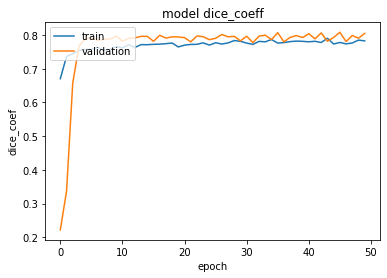

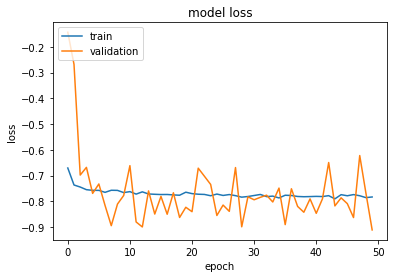

In [24]:
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice_coeff')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

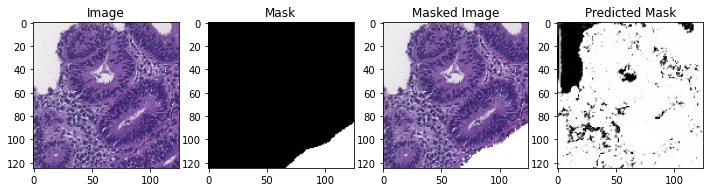

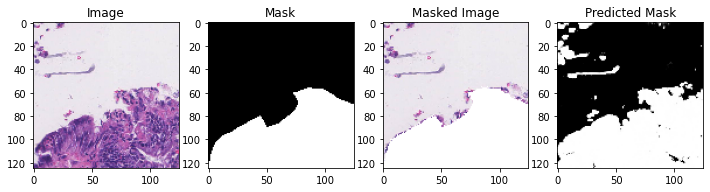

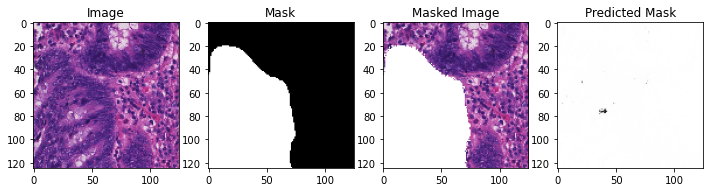

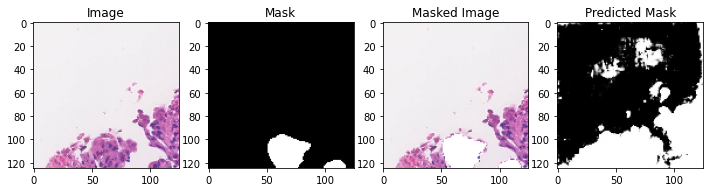

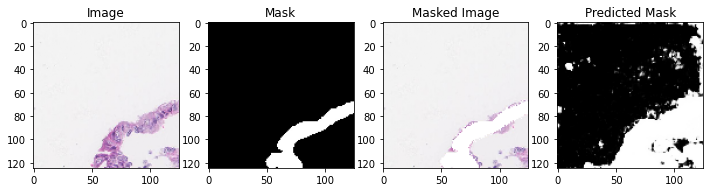

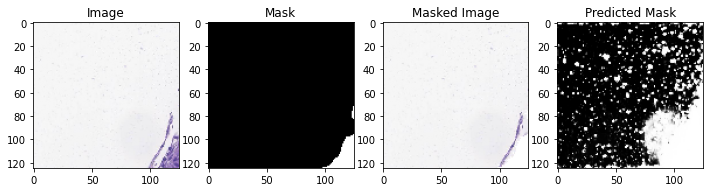

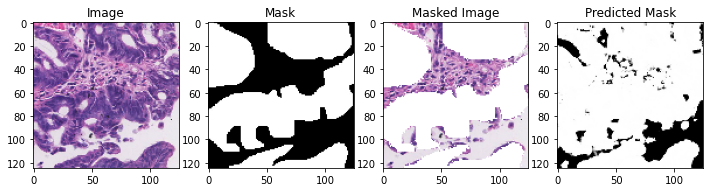

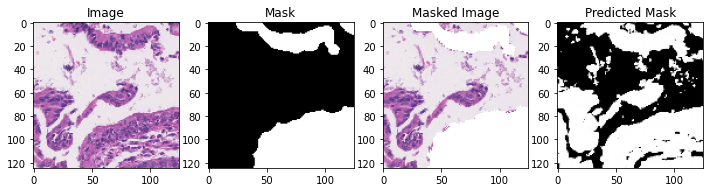

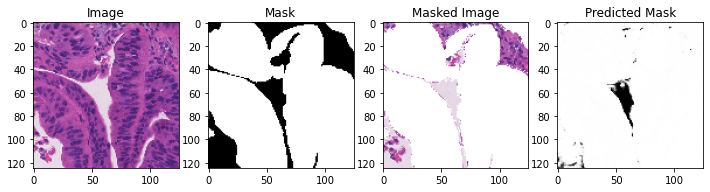

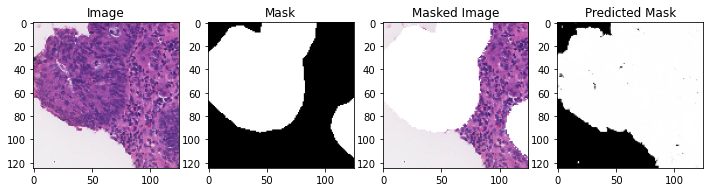

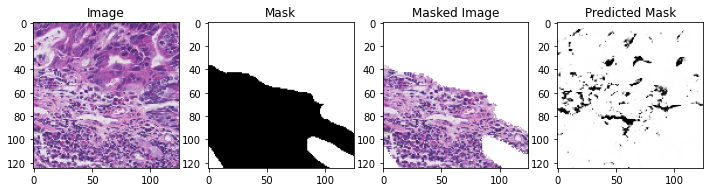

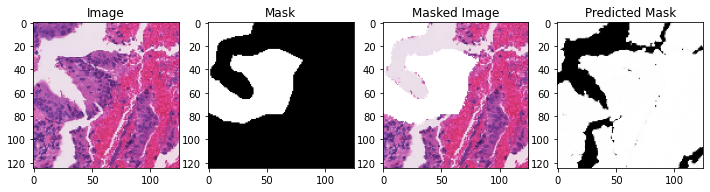

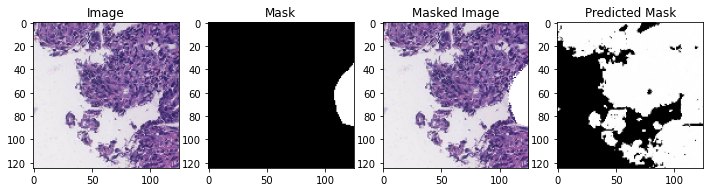

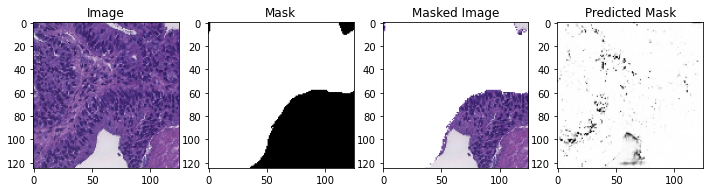

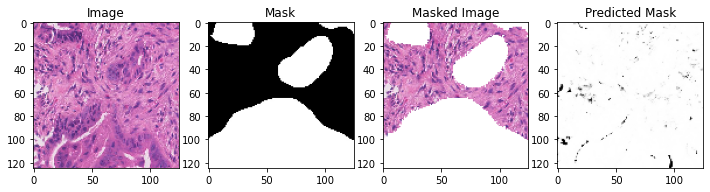

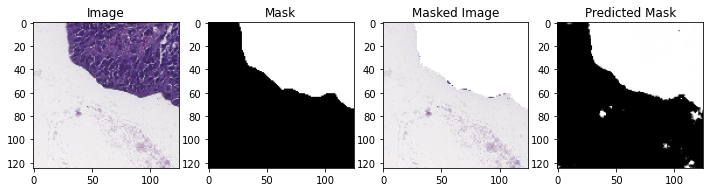

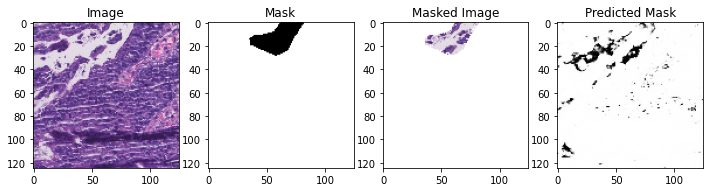

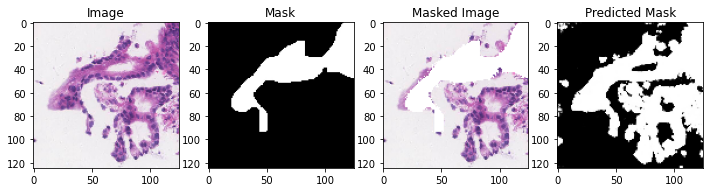

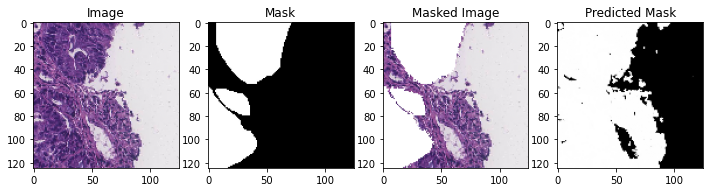

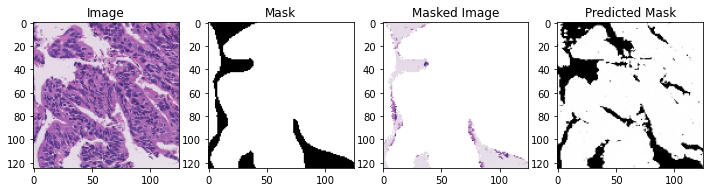

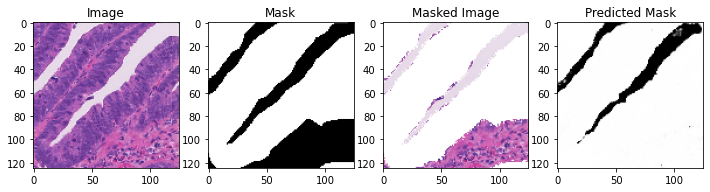

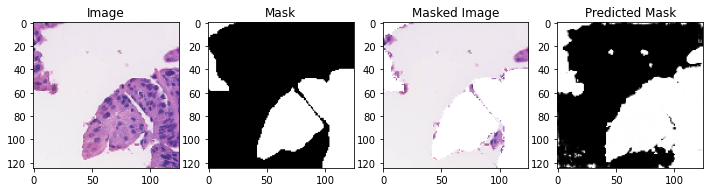

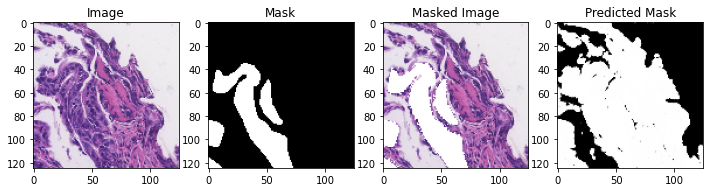

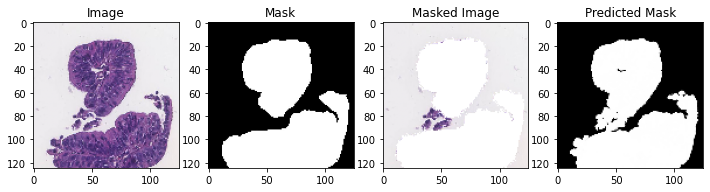

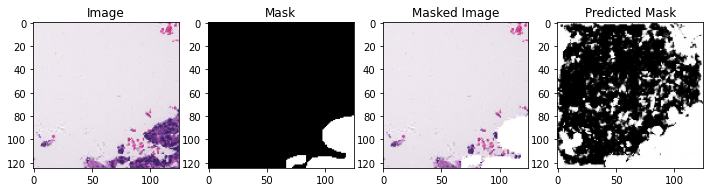

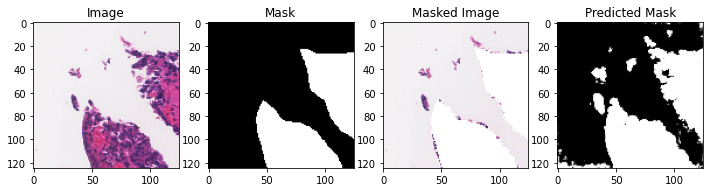

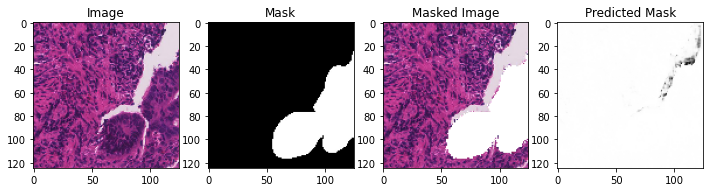

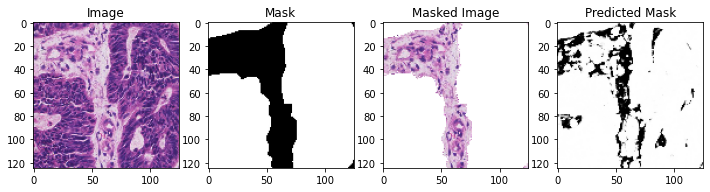

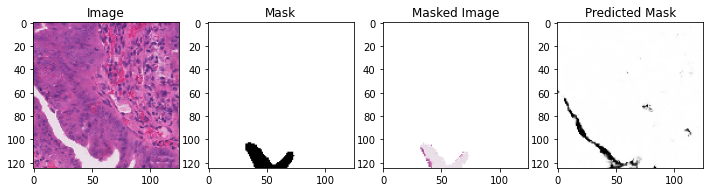

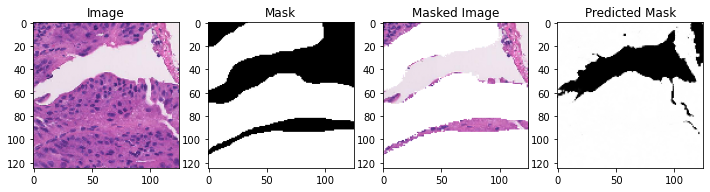

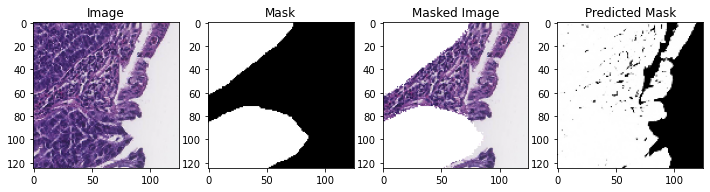

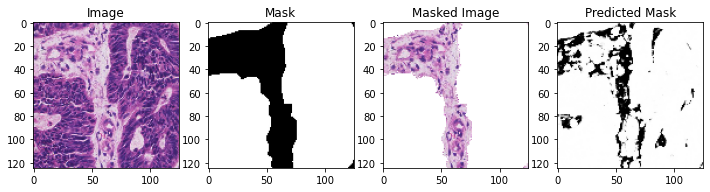

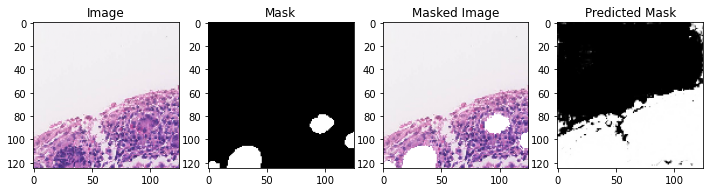

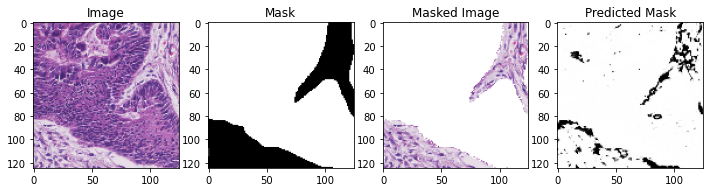

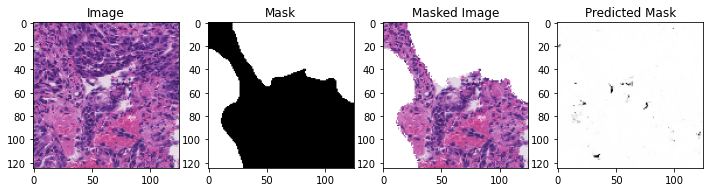

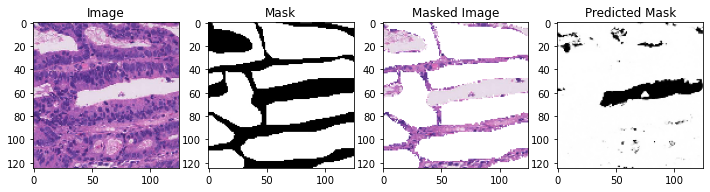

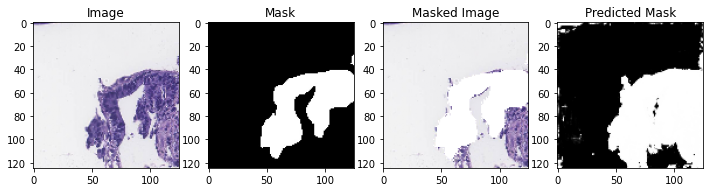

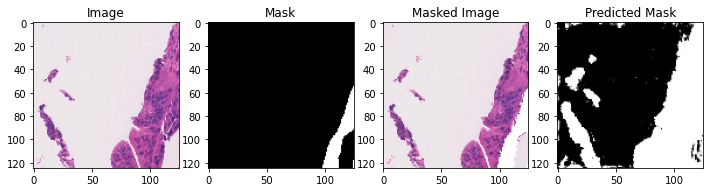

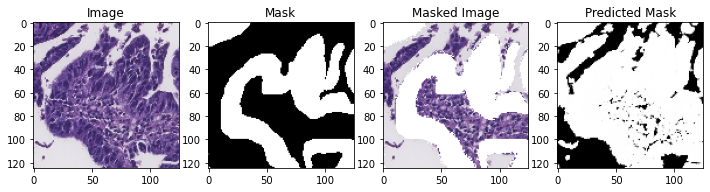

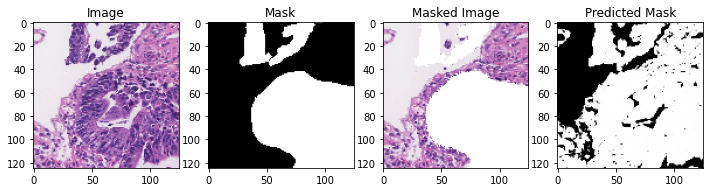

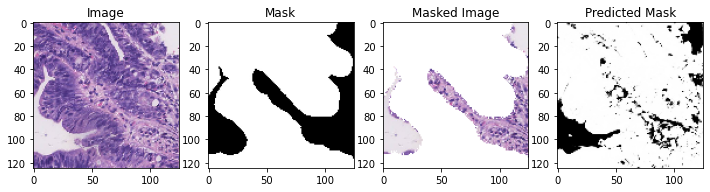

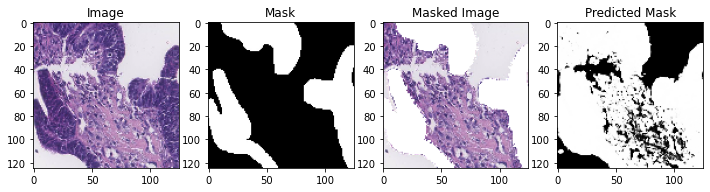

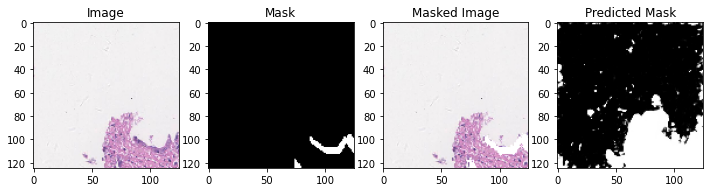

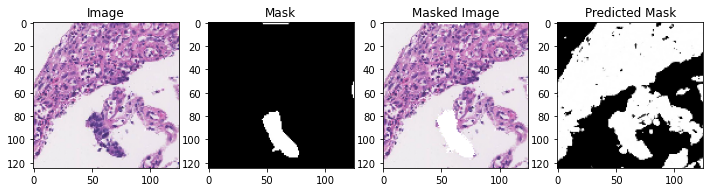

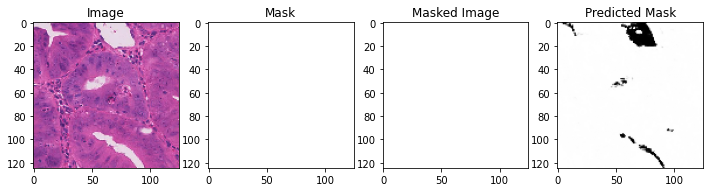

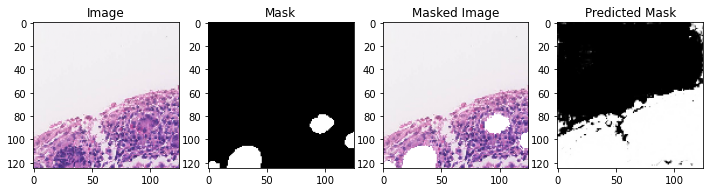

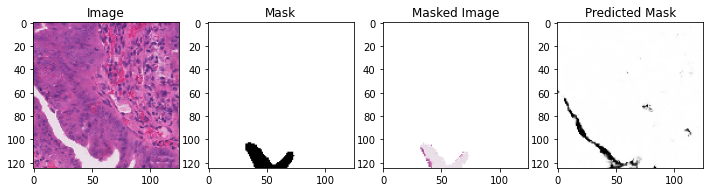

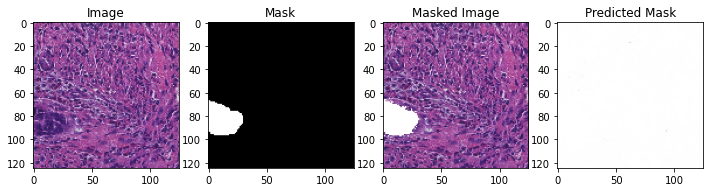

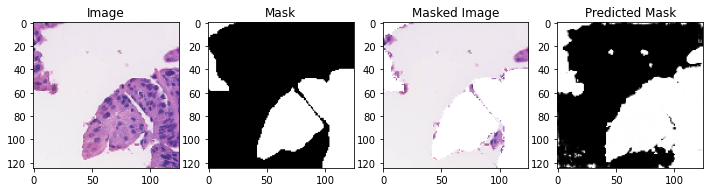

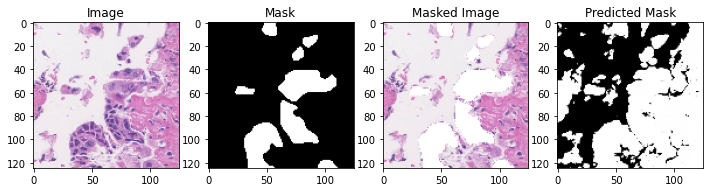

In [25]:
import numpy as np
import pandas as pd
import os
import random
import PIL
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_predicted_mask_path = "LinkNet_InceptionResNetV2_results_epoch50_dir"
img_size = (125, 125)

plt.rcParams['figure.figsize'] = 12,6

for i in range(50):
    img_name = random.choice(os.listdir(test_img_path))
    img_path = os.path.join(test_img_path, img_name)
    img = np.array(load_img(img_path, grayscale=False, target_size=img_size)) / 255.
    mask_path = os.path.join(test_masks_path, img_name)
    img_mask = np.array(load_img(mask_path, grayscale=False, target_size=img_size)) / 255.
    masked_img = np.where(img_mask, 1, img)
    predicted_mask_path = os.path.join(test_predicted_mask_path, img_name)
    predicted_img_mask = np.array(load_img(predicted_mask_path, grayscale=False, target_size=img_size)) / 255.
    
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[1].imshow(img_mask)
    axs[1].set_title('Mask')
    axs[2].imshow(masked_img)
    axs[2].set_title('Masked Image')
    axs[3].imshow(predicted_img_mask)
    axs[3].set_title('Predicted Mask')

In [ ]:
print("Done!!!!!!!")

# Epochs: 75

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples//batch_size,
                    epochs=75,
                    verbose = 2,                              
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples//batch_size)

In [ ]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

In [ ]:
prediction = model.predict_generator(test_generator, verbose=1, steps=nb_test_samples)

In [ ]:
test_results = model.evaluate_generator(test_generator, steps=50)

# print(model.metrics_names)
# print(test_results)

In [ ]:
for metrics,results in zip(model.metrics_names,test_results):
    print (str(metrics)+" : "+ str(results))

In [ ]:
coef = np.array(history.history['Jaccard_index'])
val_coef = np.array(history.history['val_Jaccard_index'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))

In [ ]:
os.mkdir('LinkNet_InceptionResNetV2_results_epoch75_dir')

In [ ]:
def normalizeData(img,mask):
    mean = np.mean(img)
    std = np.std(img)
    img -= mean
    img /= std
    mask = mask /255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_data_pred_dir = "LinkNet_InceptionResNetV2_results_epoch75_dir"
img_rows, img_cols = 512, 512

In [ ]:
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file), target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    pred = model.predict([img])
#     sess = tf.Session()
    score = Jaccard_index(img_mask, pred)
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '.png'))

with open("LinkNet_InceptionResNetV2_results_epoch75_results.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

In [ ]:
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice_coeff')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import PIL
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_predicted_mask_path = "LinkNet_InceptionResNetV2_results_epoch75_dir"
img_size = (125, 125)

plt.rcParams['figure.figsize'] = 12,6

for i in range(150):
    img_name = random.choice(os.listdir(test_img_path))
    img_path = os.path.join(test_img_path, img_name)
    img = np.array(load_img(img_path, grayscale=False, target_size=img_size)) / 255.
    mask_path = os.path.join(test_masks_path, img_name)
    img_mask = np.array(load_img(mask_path, grayscale=False, target_size=img_size)) / 255.
    masked_img = np.where(img_mask, 1, img)
    predicted_mask_path = os.path.join(test_predicted_mask_path, img_name)
    predicted_img_mask = np.array(load_img(predicted_mask_path, grayscale=False, target_size=img_size)) / 255.
    
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[1].imshow(img_mask)
    axs[1].set_title('Mask')
    axs[2].imshow(masked_img)
    axs[2].set_title('Masked Image')
    axs[3].imshow(predicted_img_mask)
    axs[3].set_title('Predicted Mask')

In [ ]:
print("done!!!!!!!!!!!!")

In [ ]:
print("done!!!!!!!!!!!!")

# Epochs: 100

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples//batch_size,
                    epochs=100,
                    verbose = 2,                              
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples//batch_size)

In [ ]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

In [ ]:
test_results = model.evaluate_generator(test_generator, steps=50)

# print(model.metrics_names)
# print(test_results)

In [ ]:
for metrics,results in zip(model.metrics_names,test_results):
    print (str(metrics)+" : "+ str(results))

In [ ]:
coef = np.array(history.history['Jaccard_index'])
val_coef = np.array(history.history['val_Jaccard_index'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))

In [ ]:
with open('history_epochs100.txt','w') as f:
    f.write(str(history.history))

In [ ]:
os.mkdir('LinkNet_InceptionResNetV2_results_epoch100_dir')

In [ ]:
def normalizeData(img,mask):
    mean = np.mean(img)
    std = np.std(img)
    img -= mean
    img /= std
    mask = mask /255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_data_pred_dir = "LinkNet_InceptionResNetV2_results_epoch100_dir"
img_rows, img_cols = 512, 512

In [ ]:
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file), target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    pred = model.predict([img])
#     sess = tf.Session()
    score = Jaccard_index(img_mask, pred)
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '.png'))

with open("LinkNet_InceptionResNetV2_results_epoch100_results.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

In [ ]:
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice_coeff')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import PIL
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_predicted_mask_path = "LinkNet_InceptionResNetV2_results_epoch100_dir"
img_size = (125, 125)

plt.rcParams['figure.figsize'] = 12,6

for i in range(150):
    img_name = random.choice(os.listdir(test_img_path))
    img_path = os.path.join(test_img_path, img_name)
    img = np.array(load_img(img_path, grayscale=False, target_size=img_size)) / 255.
    mask_path = os.path.join(test_masks_path, img_name)
    img_mask = np.array(load_img(mask_path, grayscale=False, target_size=img_size)) / 255.
    masked_img = np.where(img_mask, 1, img)
    predicted_mask_path = os.path.join(test_predicted_mask_path, img_name)
    predicted_img_mask = np.array(load_img(predicted_mask_path, grayscale=False, target_size=img_size)) / 255.
    
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[1].imshow(img_mask)
    axs[1].set_title('Mask')
    axs[2].imshow(masked_img)
    axs[2].set_title('Masked Image')
    axs[3].imshow(predicted_img_mask)
    axs[3].set_title('Predicted Mask')

In [ ]:
print("Done!!!!!")

# Epochs:125

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples//batch_size,
                    epochs=125,
                    verbose = 2,                              
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples//batch_size)

In [ ]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

In [ ]:
test_results = model.evaluate_generator(test_generator, steps=50)

# print(model.metrics_names)
# print(test_results)

In [ ]:
for metrics,results in zip(model.metrics_names,test_results):
    print (str(metrics)+" : "+ str(results))

In [ ]:
coef = np.array(history.history['Jaccard_index'])
val_coef = np.array(history.history['val_Jaccard_index'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))

In [ ]:
with open('history_epochs125.txt','w') as f:
    f.write(str(history.history))

In [ ]:
os.mkdir('LinkNet_InceptionResNetV2_results_epoch125_dir')

In [ ]:
def normalizeData(img,mask):
    mean = np.mean(img)
    std = np.std(img)
    img -= mean
    img /= std
    mask = mask /255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_data_pred_dir = "LinkNet_InceptionResNetV2_results_epoch125_dir"
img_rows, img_cols = 512, 512

In [ ]:
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file), target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    pred = model.predict([img])
#     sess = tf.Session()
    score = Jaccard_index(img_mask, pred)
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '.png'))

with open("LinkNet_InceptionResNetV2_results_epoch125_results.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

In [ ]:
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice_coeff')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import PIL
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_predicted_mask_path = "LinkNet_InceptionResNetV2_results_epoch125_dir"
img_size = (125, 125)

plt.rcParams['figure.figsize'] = 12,6

for i in range(150):
    img_name = random.choice(os.listdir(test_img_path))
    img_path = os.path.join(test_img_path, img_name)
    img = np.array(load_img(img_path, grayscale=False, target_size=img_size)) / 255.
    mask_path = os.path.join(test_masks_path, img_name)
    img_mask = np.array(load_img(mask_path, grayscale=False, target_size=img_size)) / 255.
    masked_img = np.where(img_mask, 1, img)
    predicted_mask_path = os.path.join(test_predicted_mask_path, img_name)
    predicted_img_mask = np.array(load_img(predicted_mask_path, grayscale=False, target_size=img_size)) / 255.
    
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[1].imshow(img_mask)
    axs[1].set_title('Mask')
    axs[2].imshow(masked_img)
    axs[2].set_title('Masked Image')
    axs[3].imshow(predicted_img_mask)
    axs[3].set_title('Predicted Mask')

# Epochs 150

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples//batch_size,
                    epochs=150,
                    verbose = 2,                              
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples//batch_size)

In [ ]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

In [ ]:
test_results = model.evaluate_generator(test_generator, steps=50)

# print(model.metrics_names)
# print(test_results)

In [ ]:
for metrics,results in zip(model.metrics_names,test_results):
    print (str(metrics)+" : "+ str(results))

In [ ]:
coef = np.array(history.history['Jaccard_index'])
val_coef = np.array(history.history['val_Jaccard_index'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))

In [ ]:
with open('history_epochs150.txt','w') as f:
    f.write(str(history.history))

In [ ]:
os.mkdir('LinkNet_InceptionResNetV2_results_epoch150_dir')

In [ ]:
def normalizeData(img,mask):
    mean = np.mean(img)
    std = np.std(img)
    img -= mean
    img /= std
    mask = mask /255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_data_pred_dir = "LinkNet_InceptionResNetV2_results_epoch150_dir"
img_rows, img_cols = 512, 512

In [ ]:
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file), target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    pred = model.predict([img])
#     sess = tf.Session()
    score = Jaccard_index(img_mask, pred)
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '.png'))

with open("LinkNet_InceptionResNetV2_results_epoch150_results.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

In [ ]:
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice_coeff')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import PIL
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_predicted_mask_path = "LinkNet_InceptionResNetV2_results_epoch150_dir"
img_size = (125, 125)

plt.rcParams['figure.figsize'] = 12,6

for i in range(150):
    img_name = random.choice(os.listdir(test_img_path))
    img_path = os.path.join(test_img_path, img_name)
    img = np.array(load_img(img_path, grayscale=False, target_size=img_size)) / 255.
    mask_path = os.path.join(test_masks_path, img_name)
    img_mask = np.array(load_img(mask_path, grayscale=False, target_size=img_size)) / 255.
    masked_img = np.where(img_mask, 1, img)
    predicted_mask_path = os.path.join(test_predicted_mask_path, img_name)
    predicted_img_mask = np.array(load_img(predicted_mask_path, grayscale=False, target_size=img_size)) / 255.
    
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[1].imshow(img_mask)
    axs[1].set_title('Mask')
    axs[2].imshow(masked_img)
    axs[2].set_title('Masked Image')
    axs[3].imshow(predicted_img_mask)
    axs[3].set_title('Predicted Mask')

# Epochs 175

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples//batch_size,
                    epochs=175,
                    verbose = 2,                              
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples//batch_size)

In [ ]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

In [ ]:
test_results = model.evaluate_generator(test_generator, steps=50)

# print(model.metrics_names)
# print(test_results)

In [ ]:
for metrics,results in zip(model.metrics_names,test_results):
    print (str(metrics)+" : "+ str(results))

In [ ]:
coef = np.array(history.history['Jaccard_index'])
val_coef = np.array(history.history['val_Jaccard_index'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))

In [ ]:
with open('history_epochs175.txt','w') as f:
    f.write(str(history.history))

In [ ]:
os.mkdir('LinkNet_InceptionResNetV2_results_epoch175_dir')

In [ ]:
def normalizeData(img,mask):
    mean = np.mean(img)
    std = np.std(img)
    img -= mean
    img /= std
    mask = mask /255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_data_pred_dir = "LinkNet_InceptionResNetV2_results_epoch175_dir"
img_rows, img_cols = 512, 512

In [ ]:
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file), target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    pred = model.predict([img])
#     sess = tf.Session()
    score = Jaccard_index(img_mask, pred)
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '.png'))

with open("LinkNet_InceptionResNetV2_results_epoch175_results.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

In [ ]:
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice_coeff')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import PIL
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_predicted_mask_path = "LinkNet_InceptionResNetV2_results_epoch175_dir"
img_size = (125, 125)

plt.rcParams['figure.figsize'] = 12,6

for i in range(150):
    img_name = random.choice(os.listdir(test_img_path))
    img_path = os.path.join(test_img_path, img_name)
    img = np.array(load_img(img_path, grayscale=False, target_size=img_size)) / 255.
    mask_path = os.path.join(test_masks_path, img_name)
    img_mask = np.array(load_img(mask_path, grayscale=False, target_size=img_size)) / 255.
    masked_img = np.where(img_mask, 1, img)
    predicted_mask_path = os.path.join(test_predicted_mask_path, img_name)
    predicted_img_mask = np.array(load_img(predicted_mask_path, grayscale=False, target_size=img_size)) / 255.
    
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[1].imshow(img_mask)
    axs[1].set_title('Mask')
    axs[2].imshow(masked_img)
    axs[2].set_title('Masked Image')
    axs[3].imshow(predicted_img_mask)
    axs[3].set_title('Predicted Mask')

# Epochs 200

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples//batch_size,
                    epochs=200,
                    verbose = 2,                              
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples//batch_size)

In [ ]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

In [ ]:
test_results = model.evaluate_generator(test_generator, steps=50)

# print(model.metrics_names)
# print(test_results)

In [ ]:
for metrics,results in zip(model.metrics_names,test_results):
    print (str(metrics)+" : "+ str(results))

In [ ]:
coef = np.array(history.history['Jaccard_index'])
val_coef = np.array(history.history['val_Jaccard_index'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))

In [ ]:
with open('history_epochs200.txt','w') as f:
    f.write(str(history.history))

In [ ]:
os.mkdir('LinkNet_InceptionResNetV2_results_epoch200_dir')

In [ ]:
def normalizeData(img,mask):
    mean = np.mean(img)
    std = np.std(img)
    img -= mean
    img /= std
    mask = mask /255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_data_pred_dir = "LinkNet_InceptionResNetV2_results_epoch200_dir"
img_rows, img_cols = 512, 512

In [ ]:
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file), target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    pred = model.predict([img])
#     sess = tf.Session()
    score = Jaccard_index(img_mask, pred)
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '.png'))

with open("LinkNet_InceptionResNetV2_results_epoch200_results.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

In [ ]:
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice_coeff')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import PIL
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_predicted_mask_path = "LinkNet_InceptionResNetV2_results_epoch200_dir"
img_size = (125, 125)

plt.rcParams['figure.figsize'] = 12,6

for i in range(150):
    img_name = random.choice(os.listdir(test_img_path))
    img_path = os.path.join(test_img_path, img_name)
    img = np.array(load_img(img_path, grayscale=False, target_size=img_size)) / 255.
    mask_path = os.path.join(test_masks_path, img_name)
    img_mask = np.array(load_img(mask_path, grayscale=False, target_size=img_size)) / 255.
    masked_img = np.where(img_mask, 1, img)
    predicted_mask_path = os.path.join(test_predicted_mask_path, img_name)
    predicted_img_mask = np.array(load_img(predicted_mask_path, grayscale=False, target_size=img_size)) / 255.
    
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[1].imshow(img_mask)
    axs[1].set_title('Mask')
    axs[2].imshow(masked_img)
    axs[2].set_title('Masked Image')
    axs[3].imshow(predicted_img_mask)
    axs[3].set_title('Predicted Mask')

# Epochs 225

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples//batch_size,
                    epochs=225,
                    verbose = 2,                              
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples//batch_size)

In [ ]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

In [ ]:
test_results = model.evaluate_generator(test_generator, steps=50)

# print(model.metrics_names)
# print(test_results)

In [ ]:
for metrics,results in zip(model.metrics_names,test_results):
    print (str(metrics)+" : "+ str(results))

In [ ]:
coef = np.array(history.history['Jaccard_index'])
val_coef = np.array(history.history['val_Jaccard_index'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))

In [ ]:
with open('history_epochs225.txt','w') as f:
    f.write(str(history.history))

In [ ]:
os.mkdir('LinkNet_InceptionResNetV2_results_epoch225_dir')

In [ ]:
def normalizeData(img,mask):
    mean = np.mean(img)
    std = np.std(img)
    img -= mean
    img /= std
    mask = mask /255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_data_pred_dir = "LinkNet_InceptionResNetV2_results_epoch225_dir"
img_rows, img_cols = 512, 512

In [ ]:
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file), target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    pred = model.predict([img])
#     sess = tf.Session()
    score = Jaccard_index(img_mask, pred)
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '.png'))

with open("LinkNet_InceptionResNetV2_results_epoch225_results.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

In [ ]:
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice_coeff')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import PIL
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_predicted_mask_path = "LinkNet_InceptionResNetV2_results_epoch225_dir"
img_size = (125, 125)

plt.rcParams['figure.figsize'] = 12,6

for i in range(150):
    img_name = random.choice(os.listdir(test_img_path))
    img_path = os.path.join(test_img_path, img_name)
    img = np.array(load_img(img_path, grayscale=False, target_size=img_size)) / 255.
    mask_path = os.path.join(test_masks_path, img_name)
    img_mask = np.array(load_img(mask_path, grayscale=False, target_size=img_size)) / 255.
    masked_img = np.where(img_mask, 1, img)
    predicted_mask_path = os.path.join(test_predicted_mask_path, img_name)
    predicted_img_mask = np.array(load_img(predicted_mask_path, grayscale=False, target_size=img_size)) / 255.
    
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[1].imshow(img_mask)
    axs[1].set_title('Mask')
    axs[2].imshow(masked_img)
    axs[2].set_title('Masked Image')
    axs[3].imshow(predicted_img_mask)
    axs[3].set_title('Predicted Mask')

# Epochs 250

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples//batch_size,
                    epochs=250,
                    verbose = 2,                              
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples//batch_size)

In [ ]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

In [ ]:
test_results = model.evaluate_generator(test_generator, steps=50)

# print(model.metrics_names)
# print(test_results)

In [ ]:
for metrics,results in zip(model.metrics_names,test_results):
    print (str(metrics)+" : "+ str(results))

In [ ]:
coef = np.array(history.history['Jaccard_index'])
val_coef = np.array(history.history['val_Jaccard_index'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))

In [ ]:
with open('history_epochs250.txt','w') as f:
    f.write(str(history.history))

In [ ]:
os.mkdir('LinkNet_InceptionResNetV2_results_epoch250_dir')

In [ ]:
def normalizeData(img,mask):
    mean = np.mean(img)
    std = np.std(img)
    img -= mean
    img /= std
    mask = mask /255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_data_pred_dir = "LinkNet_InceptionResNetV2_results_epoch250_dir"
img_rows, img_cols = 512, 512

In [ ]:
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file), target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    pred = model.predict([img])
#     sess = tf.Session()
    score = Jaccard_index(img_mask, pred)
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '.png'))

with open("LinkNet_InceptionResNetV2_results_epoch250_results.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

In [ ]:
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice_coeff')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import PIL
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

test_img_path = '/kaggle/input/digestpath-withoutaug-patched/test/images'
test_masks_path = '/kaggle/input/digestpath-withoutaug-patched/test/masks'
test_predicted_mask_path = "LinkNet_InceptionResNetV2_results_epoch250_dir"
img_size = (125, 125)

plt.rcParams['figure.figsize'] = 12,6

for i in range(150):
    img_name = random.choice(os.listdir(test_img_path))
    img_path = os.path.join(test_img_path, img_name)
    img = np.array(load_img(img_path, grayscale=False, target_size=img_size)) / 255.
    mask_path = os.path.join(test_masks_path, img_name)
    img_mask = np.array(load_img(mask_path, grayscale=False, target_size=img_size)) / 255.
    masked_img = np.where(img_mask, 1, img)
    predicted_mask_path = os.path.join(test_predicted_mask_path, img_name)
    predicted_img_mask = np.array(load_img(predicted_mask_path, grayscale=False, target_size=img_size)) / 255.
    
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[1].imshow(img_mask)
    axs[1].set_title('Mask')
    axs[2].imshow(masked_img)
    axs[2].set_title('Masked Image')
    axs[3].imshow(predicted_img_mask)
    axs[3].set_title('Predicted Mask')

In [ ]:
output_filename = "DigestPath_VGG16_SGD1_100Epochs"
dir_name = "/kaggle/working"

import shutil
shutil.make_archive(output_filename, "zip", dir_name)